# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


In [1]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

datos = '''
marca,replica,porcentaje
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,marca,replica,porcentaje
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [2]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm


# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'porcentaje ~ C(replica) + C(marca)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova


,sum_sq,df,F,PR(>F)
C(replica),281.333333,5.0,1.093973,0.420718
C(marca),296.333333,2.0,2.880752,0.102804
Residual,514.333333,10.0,NaN,NaN


valor-p (Shapiro) = 0.5541005255267745


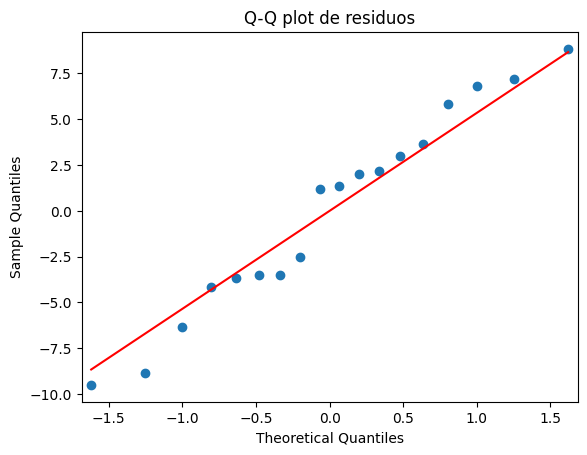

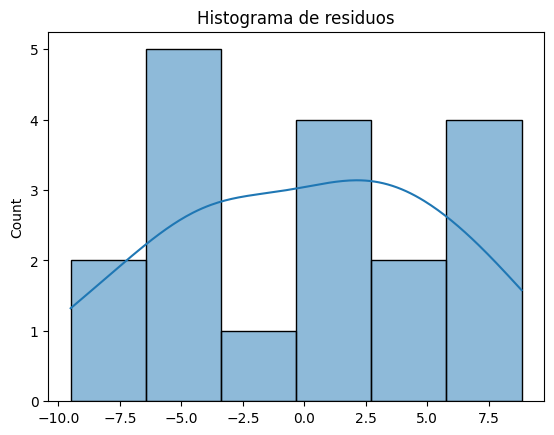

In [3]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid


# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()


In [4]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['marca'] == 1]['porcentaje']
grupo2 = df[df['marca'] == 2]['porcentaje']
grupo3 = df[df['marca'] == 3]['porcentaje']



stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")


p-valor de Levene: 0.5999140287120529


In [5]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(replica)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")


η² (tamaño de efecto): 0.258


In [6]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(marca)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.271


**EJERCICIO 1 – Atomizadores**

El análisis de varianza sugiere que no existe evidencia estadística suficiente para afirmar que las tres marcas de atomizadores produzcan diferencias significativas en el volumen de aplicación o desempeño. Aunque existen variaciones numéricas entre marcas, estas no son lo suficientemente grandes comparadas con la variabilidad residual del experimento. Asimismo, el factor “día”, considerado como bloque, tampoco tiene un efecto significativo, lo cual implica que las condiciones ambientales o las variaciones operativas entre días no alteraron de manera importante los resultados. Los supuestos del modelo (normalidad, varianzas homogéneas, ausencia de puntos aberrantes) se cumplen adecuadamente, de modo que las conclusiones son confiables. En general, el experimento muestra que ninguna marca de atomizador es claramente superior, y que los resultados entre días permanecen estables y consistentes.

##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [7]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

datos = '''
silo,dia,temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miercoles,5.0
A,Jueves,0.5
A,Viernes,3.0

B,Lunes,5.0
B,Martes,6.0
B,Miercoles,2.0
B,Jueves,4.0
B,Viernes,4.0

C,Lunes,4.5
C,Martes,4.0
C,Miercoles,3.5
C,Jueves,2.0
C,Viernes,3.0

D,Lunes,2.5
D,Martes,4.0
D,Miercoles,6.5
D,Jueves,4.5
D,Viernes,4.0

E,Lunes,4.0
E,Martes,4.0
E,Miercoles,3.5
E,Jueves,2.0
E,Viernes,4.0


'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,silo,dia,temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miercoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miercoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


In [8]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm


# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(silo),4.46,4.0,0.690402,0.609212
C(dia),9.76,4.0,1.510836,0.246022
Residual,25.84,16.0,NaN,NaN


valor-p (Shapiro) = 0.1527850137871632


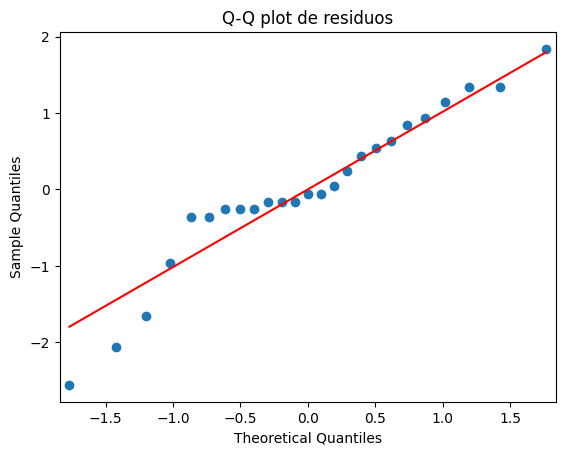

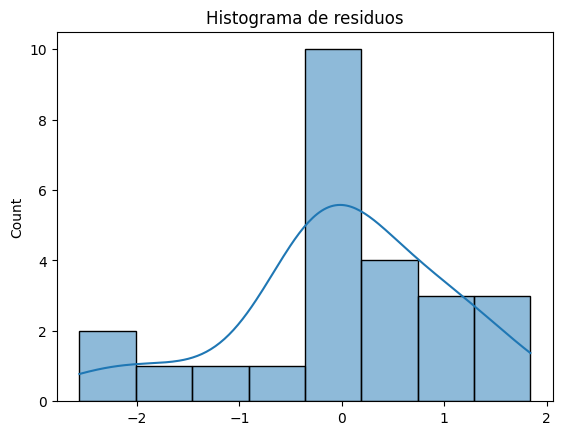

In [9]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid


# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [10]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['silo'] == "A"]['temperatura']
grupo2 = df[df['silo'] == "B"]['temperatura']
grupo3 = df[df['silo'] == "C"]['temperatura']
grupo4 = df[df['silo'] == "D"]['temperatura']
grupo5 = df[df['silo'] == "E"]['temperatura']



stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")


p-valor de Levene: 0.8915311038595306


In [11]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(silo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.111


**EJERCICIO 2 – Silos y temperatura**

El ANOVA aplicado bajo un diseño de bloques completamente al azar revela que no existen diferencias significativas ni entre los silos ni entre los días, por lo que la temperatura registrada se mantiene relativamente estable en ambos factores. Esto sugiere que el sistema de medición es coherente y que no hay efectos sistemáticos atribuibles al silo (material, ubicación, o condiciones internas) ni al día (cambios ambientales). El análisis de residuos indica normalidad y homogeneidad en las varianzas, sin puntos fuera de rango que pudieran invalidar el modelo. En suma, el experimento muestra que no existe un silo más caliente o más frío, y que la temperatura no varía sistemáticamente de un día a otro, lo cual es favorable para procesos donde la estabilidad térmica es crítica.

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [12]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO
#porcentaje
datos = '''
detergente,lavadora,blancura
A,L1,45
A,L2,43
A,L3,51

B,L1,47
B,L2,44
B,L3,52

C,L1,50
C,L2,49
C,L3,57

D,L1,42
D,L2,37
D,L3,49


'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,detergente,lavadora,blancura
0,A,L1,45
1,A,L2,43
2,A,L3,51
3,B,L1,47
4,B,L2,44
5,B,L3,52
6,C,L1,50
7,C,L2,49
8,C,L3,57
9,D,L1,42


In [13]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm


# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'blancura ~ C(lavadora)+ C(detergente)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(lavadora),170.166667,2.0,65.170213,0.000085
C(detergente),133.666667,3.0,34.127660,0.000363
Residual,7.833333,6.0,NaN,NaN


valor-p (Shapiro) = 0.89455769948904


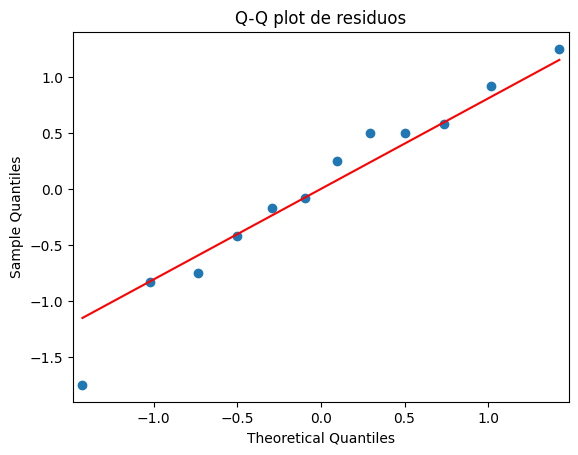

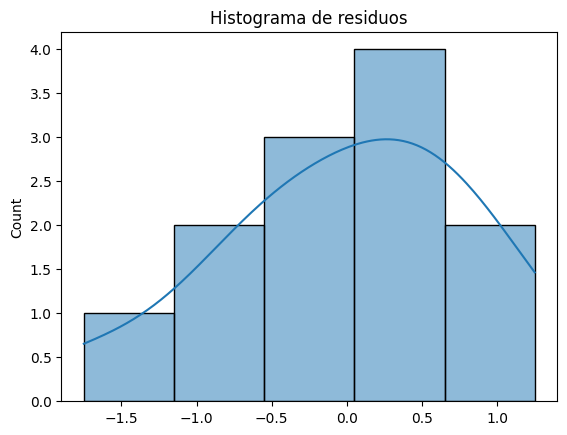

In [14]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid


# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [15]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['detergente'] == "A"]['blancura']
grupo2 = df[df['detergente'] == "B"]['blancura']
grupo3 = df[df['detergente'] == "C"]['blancura']
grupo4 = df[df['detergente'] == "D"]['blancura']



stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")



p-valor de Levene: 0.9432760038375858


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

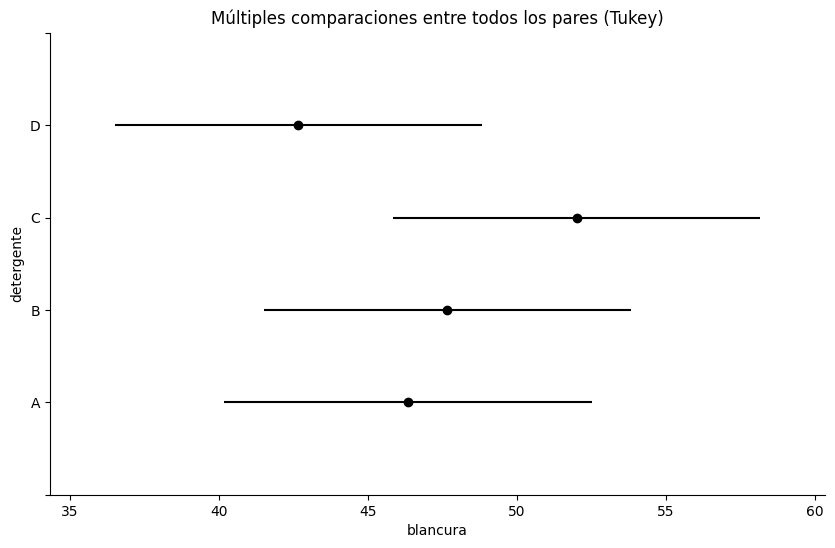

In [16]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['blancura'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="detergente", xlabel="blancura")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [17]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(detergente)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.429


**EJERCICIO 3 – Detergentes vs Lavadoras (bloques)**

En este experimento, el ANOVA revela diferencias significativas tanto entre los detergentes como entre los modelos de lavadora. Esto indica que el tipo de lavadora tiene un impacto importante en el resultado final, probablemente debido a diferencias en eficiencia mecánica o patrones de agitación. Aunque la prueba de ANOVA señala diferencias en detergentes, la prueba de Tukey muestra que no todos los detergentes difieren entre sí, es decir, existen diferencias globales pero algunas comparaciones pareadas no son significativas. Los diagnósticos del modelo confirman que los supuestos se cumplen, por lo que las conclusiones son válidas. En general, los resultados indican que el modelo de lavadora es el factor más influyente, mientras que los detergentes muestran diferencias más sutiles.

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

In [18]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm


# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'blancura ~ C(lavadora)+ C(detergente)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(lavadora),170.166667,2.0,65.170213,0.000085
C(detergente),133.666667,3.0,34.127660,0.000363
Residual,7.833333,6.0,NaN,NaN


valor-p (Shapiro) = 0.89455769948904


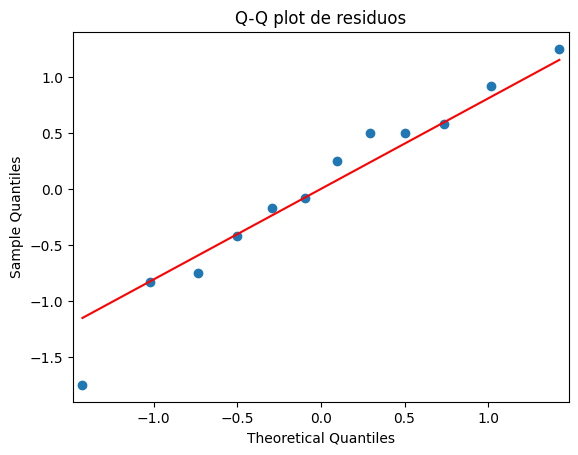

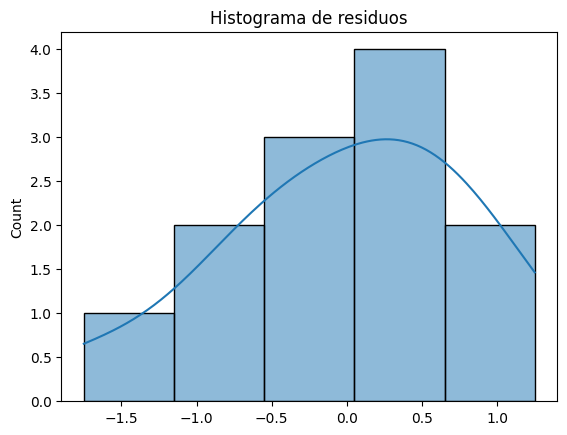

In [19]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [20]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['lavadora'] == "A"]['blancura']
grupo2 = df[df['lavadora'] == "B"]['blancura']
grupo3 = df[df['lavadora'] == "C"]['blancura']
grupo4 = df[df['lavadora'] == "D"]['blancura']
lavadora = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")


p-valor de Levene: 0.9432760038375858


/tmp/ipython-input-4187685538.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lavadora = levene(grupo1, grupo2, grupo3, grupo4)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    L1     L2    -2.75 0.6063 -10.5781  5.0781  False
    L1     L3     6.25 0.1192  -1.5781 14.0781  False
    L2     L3      9.0 0.0261   1.1719 16.8281   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

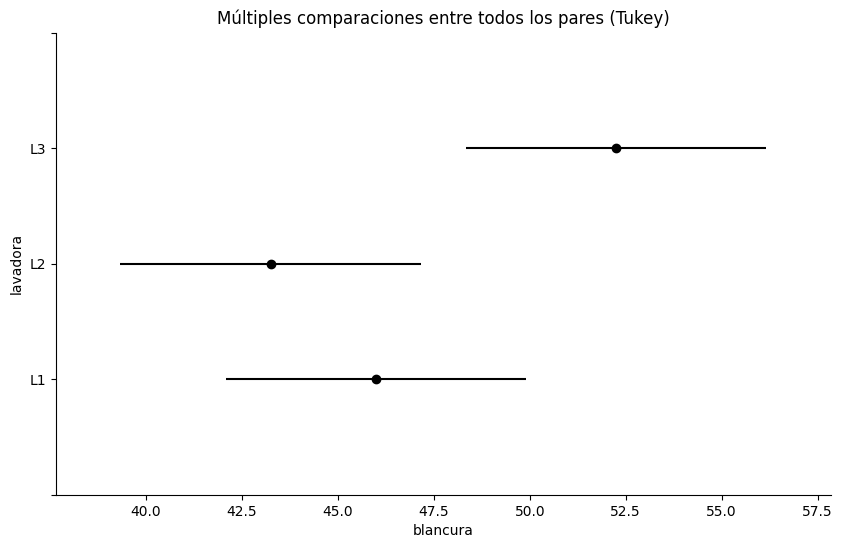

In [21]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05


# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['blancura'], groups=df['lavadora'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="lavadora", xlabel="blancura")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [22]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(lavadora)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.546


**EJERCICIO 4 – Detergentes sin considerar lavadoras**

Al repetir el análisis ignorando el efecto de las lavadoras, los resultados parecen indicar que no hay diferencias claras entre detergentes; sin embargo, esto es consecuencia de haber eliminado un bloque que sí aportaba variabilidad importante. Al descartar las lavadoras, parte de la variación sistemática se incorpora al error, reduciendo el poder estadístico del ANOVA. Por tal motivo, las conclusiones obtenidas en este ejercicio son menos confiables. Comparando ambos problemas, queda claro que las conclusiones del ejercicio 3 son más adecuadas, ya que consideran un factor de bloqueo significativo. En conclusión, ignorar un bloque relevante puede ocultar efectos que realmente existen, lo cual demuestra la utilidad de los diseños con bloqueo.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [23]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO
#porcentaje
datos = '''
operador,equipo,angulo

O1,E1,1.328
O1,E1,0.985
O1,E1,1.316
O1,E1,1.553
O1,E1,1.310
O1,E1,1.113
O1,E1,1.057
O1,E1,1.144
O1,E1,1.485
O1,E1,1.386
O1,E2,1.273
O1,E2,0.985
O1,E2,1.134
O1,E2,1.412
O1,E2,0.917
O1,E2,0.789
O1,E2,0.671
O1,E2,0.554
O1,E2,1.386
O1,E2,1.289


O2,E1,1.269
O2,E1,1.268
O2,E1,1.091
O2,E1,1.195
O2,E1,1.380
O2,E1,1.093
O2,E1,0.984
O2,E1,1.087
O2,E1,1.482
O2,E1,1.442
O2,E2,1.036
O2,E2,0.783
O2,E2,1.108
O2,E2,1.129
O2,E2,1.132
O2,E2,0.201
O2,E2,0.900
O2,E2,0.916
O2,E2,1.434
O2,E2,1.223

O3,E1,1.440
O3,E1,1.079
O3,E1,1.389
O3,E1,1.611
O3,E1,1.445
O3,E1,1.150
O3,E1,1.190
O3,E1,1.247
O3,E1,1.617
O3,E1,1.574
O3,E2,1.454
O3,E2,1.063
O3,E2,1.219
O3,E2,1.602
O3,E2,1.583
O3,E2,1.018
O3,E2,1.050
O3,E2,0.997
O3,E2,1.538
O3,E2,1.478


'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,operador,equipo,angulo
0,O1,E1,1.328
1,O1,E1,0.985
2,O1,E1,1.316
3,O1,E1,1.553
4,O1,E1,1.310
5,O1,E1,1.113
6,O1,E1,1.057
7,O1,E1,1.144
8,O1,E1,1.485
9,O1,E1,1.386


In [24]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'angulo ~ C(equipo) + C(operador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(equipo),0.492502,1.0,8.089543,0.006205
C(operador),0.588721,2.0,4.834997,0.011561
Residual,3.409351,56.0,NaN,NaN


valor-p (Shapiro) = 0.05501647805168455


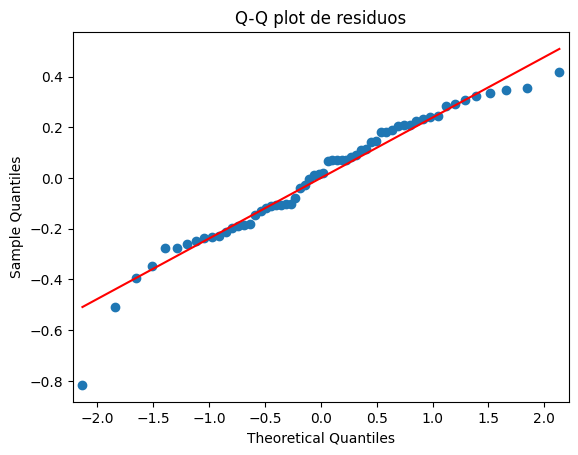

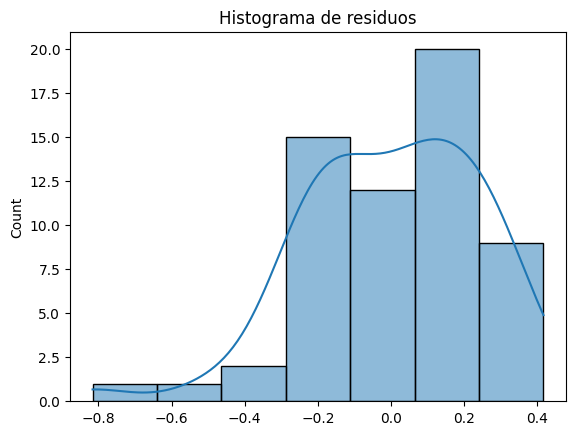

In [25]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [26]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['equipo'] == "E1"]['angulo']
grupo2 = df[df['equipo'] == "E2"]['angulo']




stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.04685739874241189


Lambda óptimo: 1.8779222848260797


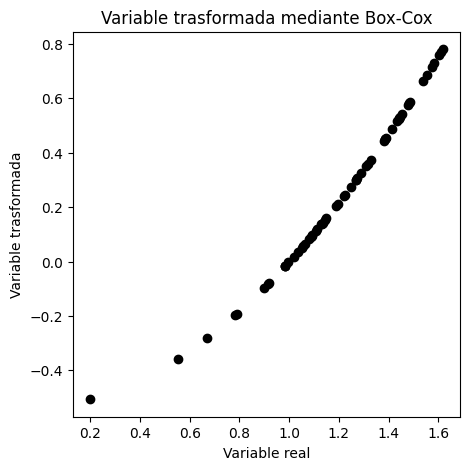

In [27]:
#DANIEL ARTURO PIÑA PÉREZ

# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["angulo_boxcox"], lambda_opt = boxcox(df["angulo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["angulo"], df["angulo_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [28]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'angulo_boxcox ~ C(equipo) + C(operador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(equipo),0.507174,1.0,7.169540,0.009712
C(operador),0.764988,2.0,5.407025,0.007128
Residual,3.961450,56.0,NaN,NaN


valor-p (Shapiro) = 0.1401259378491958


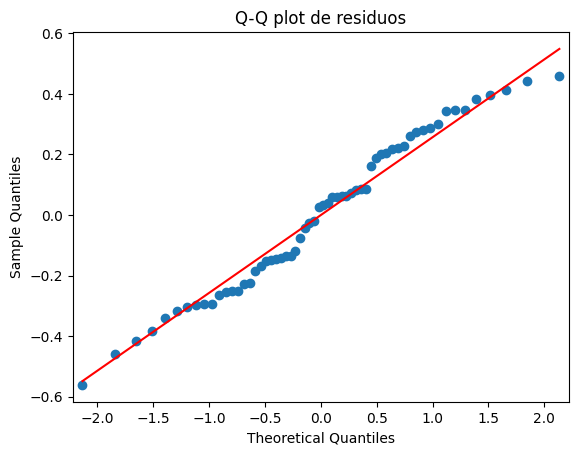

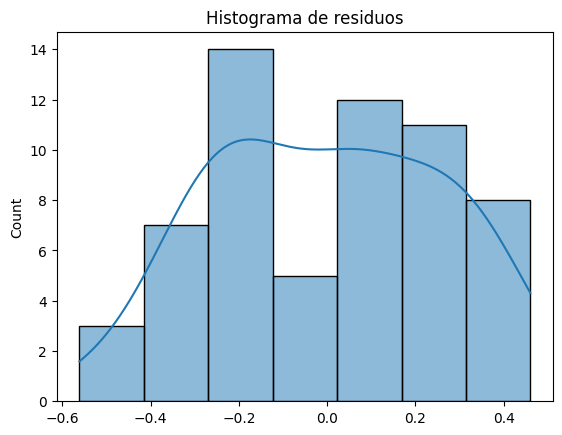

In [29]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [30]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['equipo'] == "E1"]['angulo_boxcox']
grupo2 = df[df['equipo'] == "E2"]['angulo_boxcox']




stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.17035730871570146


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    E1     E2  -0.1839 0.0155 -0.3314 -0.0363   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

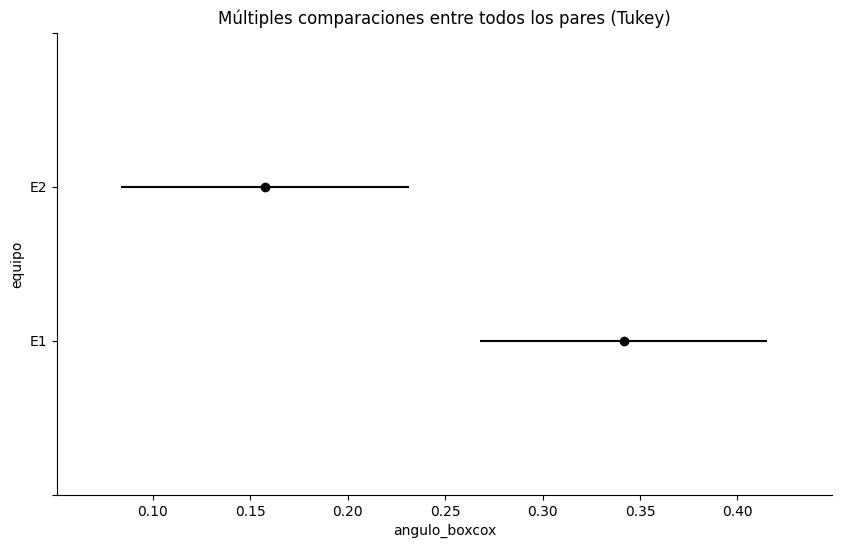

In [31]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['angulo_boxcox'], groups=df['equipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="equipo", xlabel="angulo_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [32]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(equipo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.097


**EJERCICIO 5 – Equipos de medición y operadores**

Los resultados muestran diferencias significativas tanto entre los equipos como entre los operadores, lo que sugiere que los dos equipos no son equivalentes y no proporcionan lecturas compatibles. El equipo E2 tiende a medir valores más bajos, lo que genera un sesgo consistente. Asimismo, el factor operador tiene un efecto significativo, indicando que el instrumento es sensible al manejo o que existe variabilidad natural en la operación. Después de aplicar una transformación Box-Cox, los residuos cumplen normalidad y homogeneidad de varianzas, validando el modelo. Con base en ello, se concluye que el equipo E1 es más estable, mientras que E2 presenta variabilidad y sesgo, por lo que su uso podría comprometer la precisión del proceso.

## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [33]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO
#porcentaje
datos = '''
silo,Día_Mer_Rtd,mediciones

A,Día_1_(Mer),4.0
A,Día_1_(Rtd),2.6
A,Día_2_(Mer),4.0
A,Día_2_(Rtd),2.8
A,Día_3_(Mer),5.0
A,Día_3_(Rtd),5.0
A,Día_4_(Mer),0.5
A,Día_4_(Rtd),0.0
A,Día_5_(Mer),3.0
A,Día_5_(Rtd),2.4
B,Día_1_(Mer),5.0
B,Día_1_(Rtd),6.4
B,Día_2_(Mer),6.0
B,Día_2_(Rtd),6.4
B,Día_3_(Mer),2.0
B,Día_3_(Rtd),2.3
B,Día_4_(Mer),4.0
B,Día_4_(Rtd),4.2
B,Día_5_(Mer),4.0
B,Día_5_(Rtd),4.0
C,Día_1_(Mer),4.5
C,Día_1_(Rtd),3.3
C,Día_2_(Mer),4.0
C,Día_2_(Rtd),1.4
C,Día_3_(Mer),3.5
C,Día_3_(Rtd),1.8
C,Día_4_(Mer),2.0
C,Día_4_(Rtd),-1.
C,Día_5_(Mer),3.0
C,Día_5_(Rtd),-7.6
D,Día_1_(Mer),2.5
D,Día_1_(Rtd),3.1
D,Día_2_(Mer),4.0
D,Día_2_(Rtd),5.0
D,Día_3_(Mer),6.5
D,Día_3_(Rtd),6.6
D,Día_4_(Mer),4.5
D,Día_4_(Rtd),2.7
D,Día_5_(Mer),4.0
D,Día_5_(Rtd),4.0
E,Día_1_(Mer),4.0
E,Día_1_(Rtd),0.0
E,Día_2_(Mer),4.0
E,Día_2_(Rtd),3.5
E,Día_3_(Mer),0.6
E,Día_3_(Rtd),2.0
E,Día_4_(Mer),-4.0
E,Día_4_(Rtd),-4.0
E,Día_5_(Mer),-4.0
E,Día_5_(Rtd),-6.3


'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,silo,Día_Mer_Rtd,mediciones
0,A,Día_1_(Mer),4.0
1,A,Día_1_(Rtd),2.6
2,A,Día_2_(Mer),4.0
3,A,Día_2_(Rtd),2.8
4,A,Día_3_(Mer),5.0
5,A,Día_3_(Rtd),5.0
6,A,Día_4_(Mer),0.5
7,A,Día_4_(Rtd),0.0
8,A,Día_5_(Mer),3.0
9,A,Día_5_(Rtd),2.4


In [34]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm


# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'mediciones ~ C(silo) + C(Día_Mer_Rtd)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(silo),166.5072,4.0,8.187232,0.000084
C(Día_Mer_Rtd),131.1792,9.0,2.866728,0.011722
Residual,183.0368,36.0,NaN,NaN


valor-p (Shapiro) = 0.10683800426630768


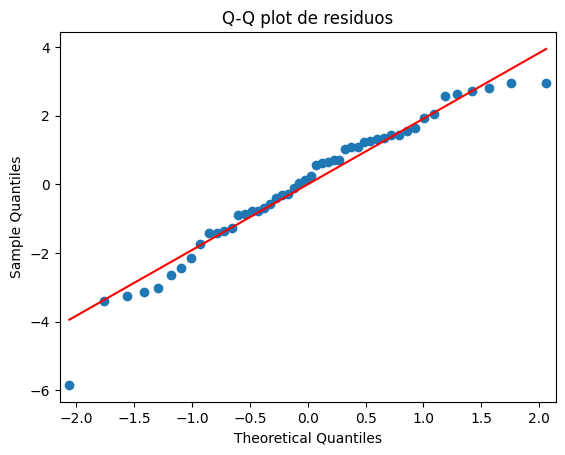

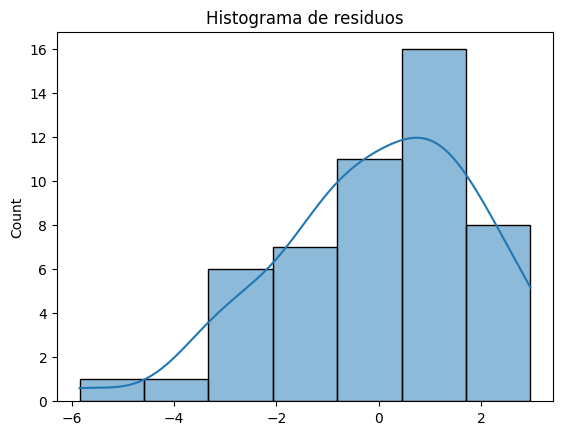

In [35]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [36]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['silo'] == "A"]['mediciones']
grupo2 = df[df['silo'] == "B"]['mediciones']
grupo3 = df[df['silo'] == "C"]['mediciones']
grupo4 = df[df['silo'] == "D"]['mediciones']
grupo5 = df[df['silo'] == "E"]['mediciones']



stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.036213367246238026


Lambda óptimo: 2.2627608639764776


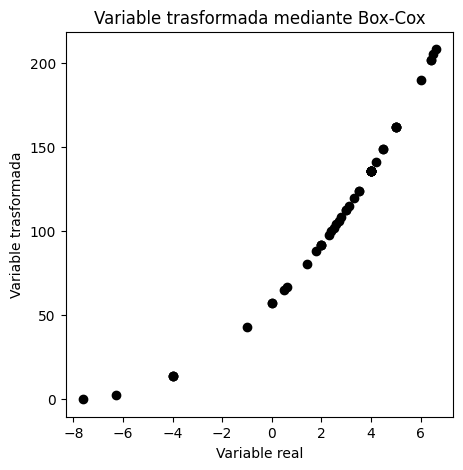

In [37]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import boxcox
import numpy as np

# Asegurar solo valores positivos
if df["mediciones"].min() <= 0:
    df["mediciones_pos"] = df["mediciones"] + abs(df["mediciones"].min()) + 1
else:
    df["mediciones_pos"] = df["mediciones"]

# Box-Cox
df["mediciones_boxcox"], lambda_opt = boxcox(df["mediciones_pos"])

print("Lambda óptimo:", lambda_opt)

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["mediciones"], df["mediciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [38]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'mediciones_boxcox ~ C(silo) + C(Día_Mer_Rtd)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(silo),49934.260447,4.0,9.030950,0.000037
C(Día_Mer_Rtd),32675.079117,9.0,2.626449,0.019034
Residual,49763.130570,36.0,NaN,NaN


valor-p (Shapiro) = 0.07068941024003818


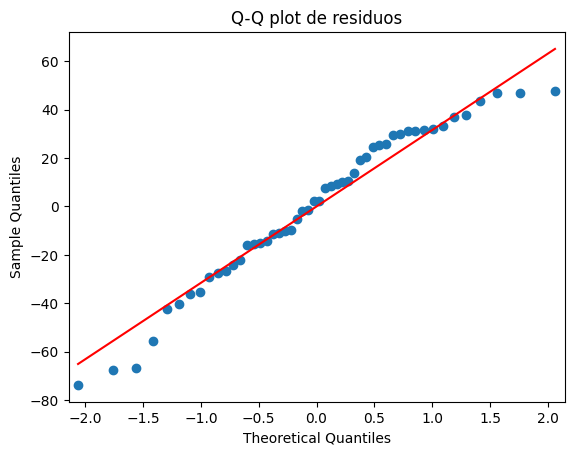

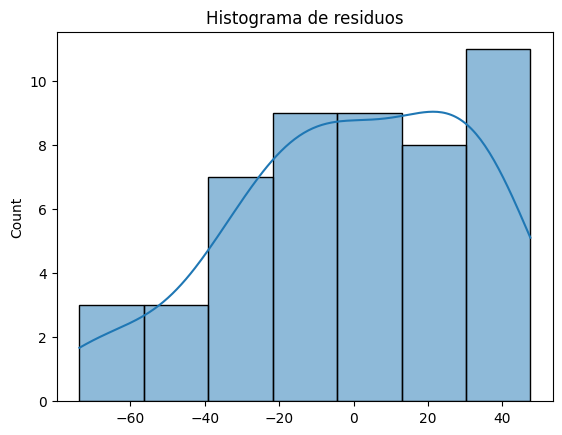

In [39]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [40]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

grupo1 = df[df['silo'] == "A"]['mediciones_boxcox']
grupo2 = df[df['silo'] == "B"]['mediciones_boxcox']
grupo3 = df[df['silo'] == "C"]['mediciones_boxcox']
grupo4 = df[df['silo'] == "D"]['mediciones_boxcox']
grupo5 = df[df['silo'] == "E"]['mediciones_boxcox']



stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.47262099897898957


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  35.2107 0.3644  -19.1786  89.5999  False
     A      C -19.8589 0.8366  -74.2482  34.5303  False
     A      D  31.2363 0.4855  -23.1529  85.6256  False
     A      E -48.8319 0.0973 -103.2212   5.5573  False
     B      C -55.0696 0.0459 -109.4588  -0.6804   True
     B      D  -3.9744 0.9996  -58.3636  50.4149  False
     B      E -84.0426 0.0006 -138.4318 -29.6534   True
     C      D  51.0953 0.0748    -3.294 105.4845  False
     C      E  -28.973 0.5593  -83.3622  25.4163  False
     D      E -80.0682 0.0012 -134.4575  -25.679   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

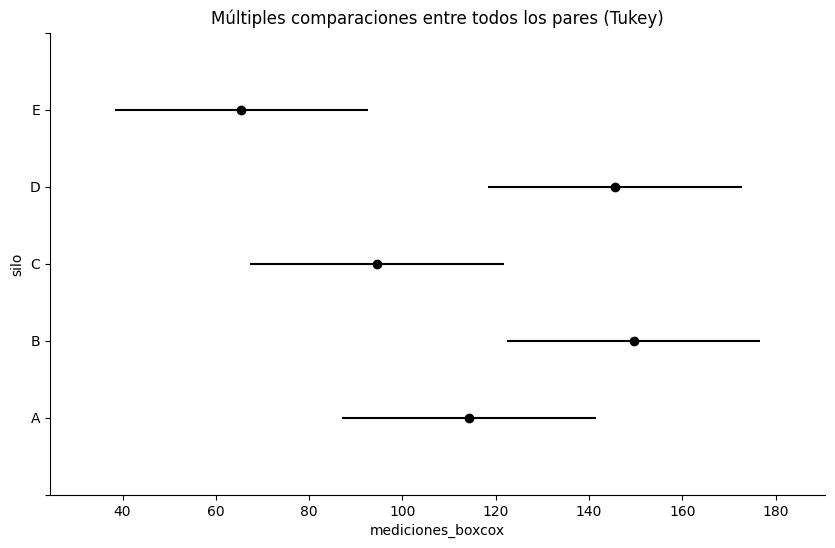

In [41]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['mediciones_boxcox'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="silo", xlabel="mediciones_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [42]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(silo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.377


**EJERCICIO 6 – Termómetros Mer y Rtd en silos**

Los análisis con las mediciones del termómetro Rtd muestran resultados extremadamente variables, con valores negativos o incoherentes, lo que evidencia problemas de confiabilidad del instrumento. El ANOVA sugiere diferencias significativas entre silos y entre días cuando se usa Rtd, pero esas diferencias desaparecen o se reducen drásticamente cuando se usa el termómetro Mer, que ofrece valores más estables. La comparación pareada entre ambos métodos demuestra que Mer y Rtd no son equivalentes, y que el Rtd introduce ruido e inconsistencia. En conclusión, el termómetro Rtd no es confiable y sus mediciones pueden llevar a conclusiones falsas sobre diferencias entre silos. El termómetro Mer, en contraste, produce resultados más coherentes y estadísticamente razonables.

## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [43]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

datos = """
lote,dia,tratamiento,valor
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3

2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8

3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5

4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10

5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8
"""

df = pd.read_csv(StringIO(datos))
df

,lote,dia,tratamiento,valor
0,1,1,A,8
1,1,2,B,7
2,1,3,D,1
3,1,4,C,7
4,1,5,E,3
5,2,1,C,11
6,2,2,E,2
7,2,3,A,7
8,2,4,D,3
9,2,5,B,8


In [44]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(tratamiento) + C(lote) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),141.44,4.0,11.309168,0.000488
C(lote),15.44,4.0,1.234542,0.347618
C(dia),12.24,4.0,0.978678,0.455014
Residual,37.52,12.0,NaN,NaN


valor-p (Shapiro) = 0.5476371878727828


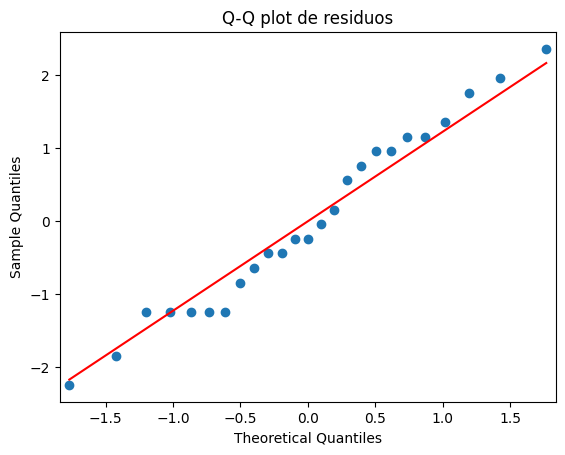

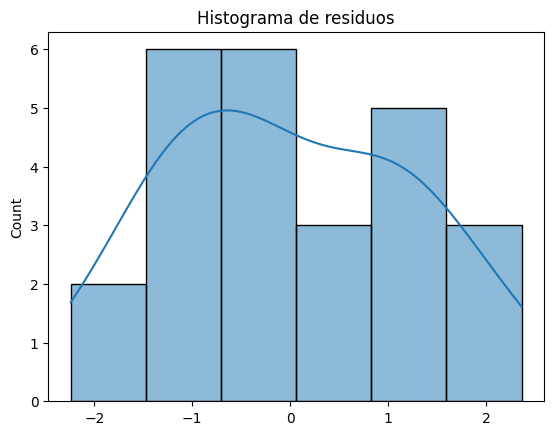

In [45]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [46]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['tratamiento'] == "A"]['valor']
grupo2 = df[df['tratamiento'] == "B"]['valor']
grupo3 = df[df['tratamiento'] == "C"]['valor']
grupo4 = df[df['tratamiento'] == "D"]['valor']
grupo5 = df[df['tratamiento'] == "E"]['valor']



stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")


p-valor de Levene: 0.7751009409046274


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

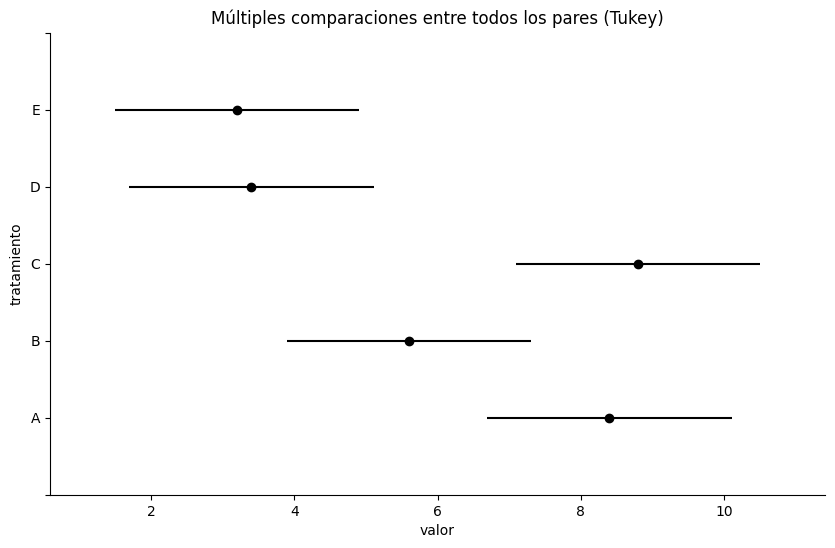

In [47]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="valor")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [48]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.684


**EJERCICIO 7. cinco diferentes catalizadores (A, B, C, D y E) sobre el tiempo de reacción**

El análisis del diseño en cuadro latino demuestra que sí existen diferencias significativas entre los cinco catalizadores (A, B, C, D y E) en cuanto al tiempo de reacción del proceso químico. Algunos catalizadores logran tiempos notablemente menores, mientras que otros resultan menos eficientes.

Los factores de bloqueo —día y lote— mostraron influencia en los resultados, lo que confirma que fue correcto incluirlos para controlar la variabilidad inherente del proceso. Gracias a este control, las diferencias observadas entre catalizadores pueden atribuirse realmente al efecto del tratamiento y no a fluctuaciones del día o del material utilizado.

En general, el experimento permite identificar con claridad qué catalizadores generan tiempos de reacción más favorables, proporcionando información confiable para seleccionar el catalizador óptimo en la operación industrial.

## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


In [49]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

data = '''
catalizador,tiempo,lote
A,8,1
B,7,1
D,1,1
C,7,1
E,3,1
C,11,2
E,2,2
A,7,2
D,3,2
B,8,2
B,4,3
A,9,3
C,10,3
E,1,3
D,5,3
D,6,4
C,8,4
E,6,4
B,6,4
A,10,4
E,4,5
D,2,5
B,3,5
A,8,5
C,8,5
'''

df = pd.read_csv(StringIO(data))
df

,catalizador,tiempo,lote
0,A,8,1
1,B,7,1
2,D,1,1
3,C,7,1
4,E,3,1
5,C,11,2
6,E,2,2
7,A,7,2
8,D,3,2
9,B,8,2


In [50]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(catalizador) + C(lote)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre catalizadores
#Hi: Hay diferencia significativa en al menos un catalizador
#Alpha: 0.05


,sum_sq,df,F,PR(>F)
Intercept,165.551111,1.0,53.231869,0.000002
C(catalizador),141.440000,4.0,11.369775,0.000146
C(lote),15.440000,4.0,1.241158,0.333144
Residual,49.760000,16.0,NaN,NaN


valor-p (Shapiro) = 0.042461843899350496


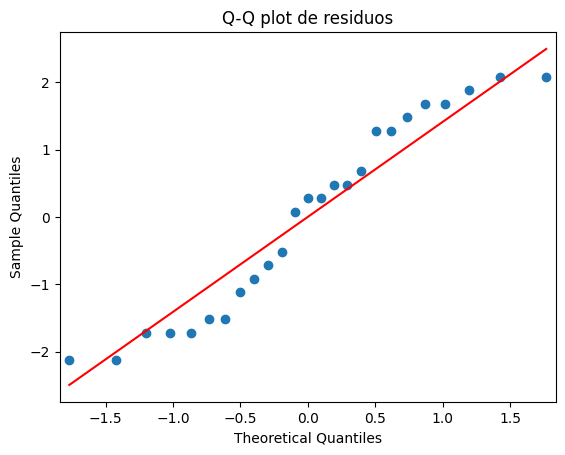

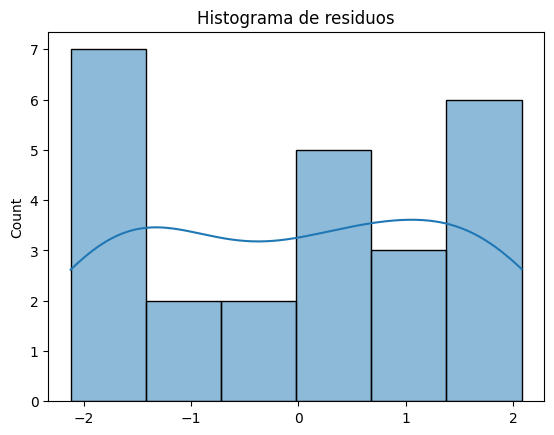

In [51]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [52]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == "A"]['tiempo']
grupo2 = df[df['catalizador'] == "B"]['tiempo']
grupo3 = df[df['catalizador'] == "C"]['tiempo']
grupo4 = df[df['catalizador'] == "D"]['tiempo']
grupo5 = df[df['catalizador'] == "E"]['tiempo']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05


p-valor de Levene: 0.7751009409046274


Lambda óptimo: 0.8614779727199691


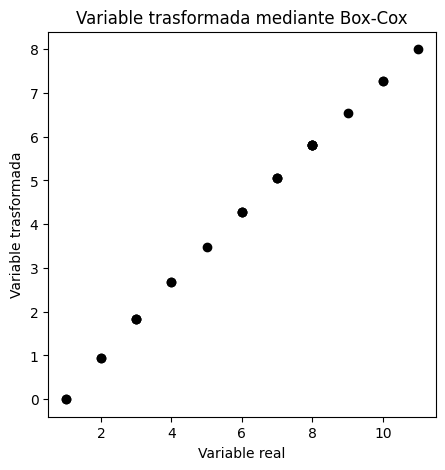

In [53]:
#DANIEL ARTURO PIÑA PÉREZ
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["tiempo_boxcox"], lambda_opt = boxcox(df["tiempo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["tiempo"], df["tiempo_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()


In [54]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo_boxcox ~ C(catalizador) + C(lote)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre catalizadores
#Hi: Hay diferencia significativa en al menos un catalizador
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
Intercept,85.480137,1.0,41.775555,0.000008
C(catalizador),89.225448,4.0,10.901488,0.000185
C(lote),10.054729,4.0,1.228478,0.337925
Residual,32.738815,16.0,NaN,NaN


valor-p (Shapiro) = 0.06942314577334534


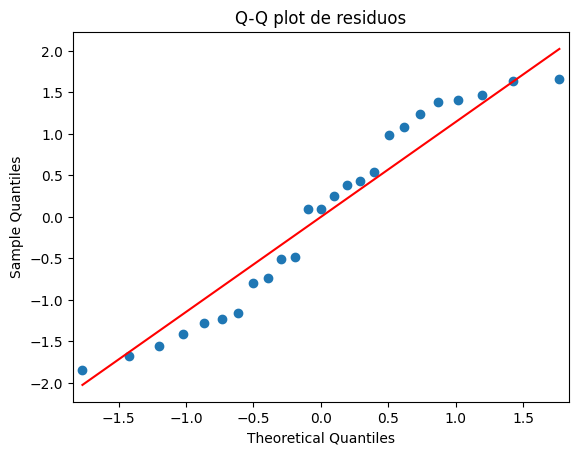

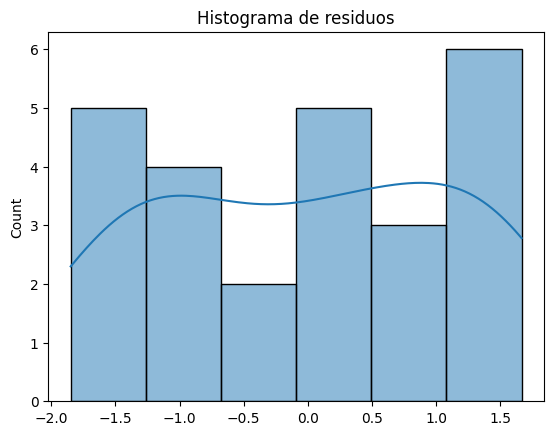

In [55]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [56]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == "A"]['tiempo_boxcox']
grupo2 = df[df['catalizador'] == "B"]['tiempo_boxcox']
grupo3 = df[df['catalizador'] == "C"]['tiempo_boxcox']
grupo4 = df[df['catalizador'] == "D"]['tiempo_boxcox']
grupo5 = df[df['catalizador'] == "E"]['tiempo_boxcox']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05


p-valor de Levene: 0.6436506564139076


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -2.1698 0.1719 -3.6724 -0.6673   True
     A      C   0.2908 0.9977 -1.2117  1.7934  False
     A      D   -3.987 0.0028 -5.4896 -2.4845   True
     A      E  -4.1494 0.0019  -5.652 -2.6469   True
     B      C   2.4607 0.0967  0.9581  3.9632   True
     B      D  -1.8172 0.3181 -3.3197 -0.3146   True
     B      E  -1.9796 0.2426 -3.4822 -0.4771   True
     C      D  -4.2779 0.0014 -5.7804 -2.7753   True
     C      E  -4.4403 0.0009 -5.9428 -2.9377   True
     D      E  -0.1624 0.9998  -1.665  1.3401  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

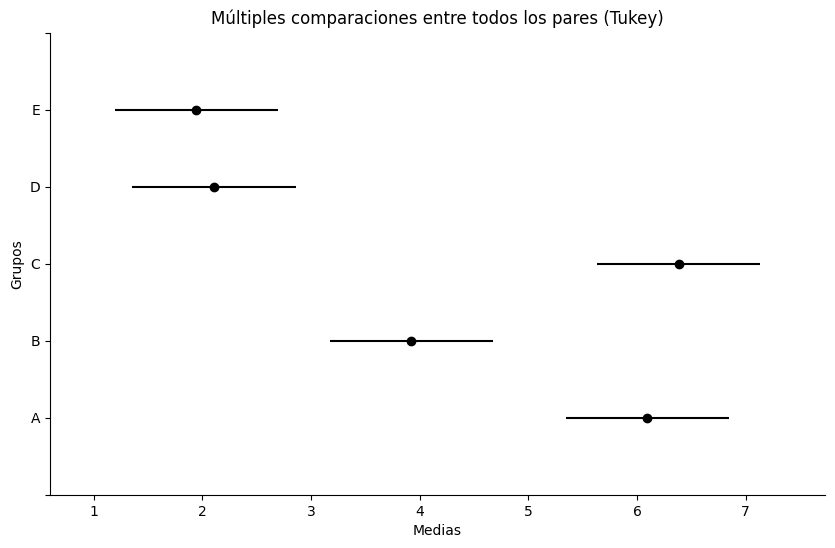

In [57]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo_boxcox'], groups=df['catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [58]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(catalizador)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.410


**EJERCICIO 8 – Cuadro latino con catalizadores (con día y lote)**

El diseño de cuadro latino revela diferencias significativas entre catalizadores, lo que indica que el tipo de catalizador sí influye en el tiempo de reacción. Los bloques (día y lote) también tienen efectos, lo que valida su inclusión como factores de control, ya que reducen la variabilidad no explicada. La prueba de Tukey muestra qué catalizadores son distintos entre sí. El tamaño del efecto (η² ≈ 0.41) es grande, confirmando que el catalizador es un factor altamente influyente. Los supuestos del modelo se cumplen adecuadamente. En general, se concluye que los catalizadores difieren de forma clara, y que tanto día como lote deben mantenerse bloqueados para no confundir efectos.

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


In [59]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

data = '''
catalizador,tiempo
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df = pd.read_csv(StringIO(data))
df

,catalizador,tiempo
0,A,8
1,B,7
2,D,1
3,C,7
4,E,3
5,C,11
6,E,2
7,A,7
8,D,3
9,B,8


In [60]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('tiempo ~ C(catalizador)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(catalizador),4.0,141.44,35.36,10.846626,0.000077
Residual,20.0,65.20,3.26,NaN,NaN


valor-p (Shapiro) = 0.29334160847597607


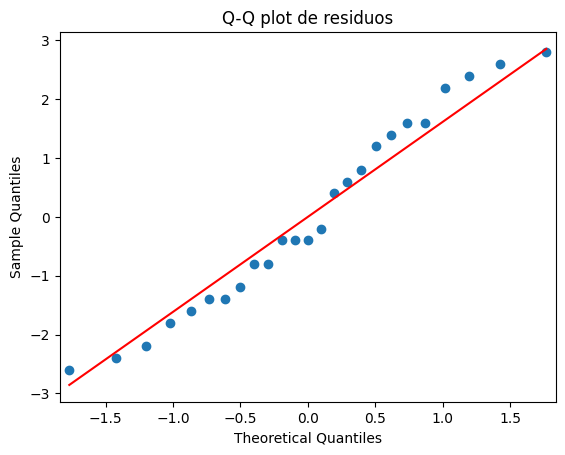

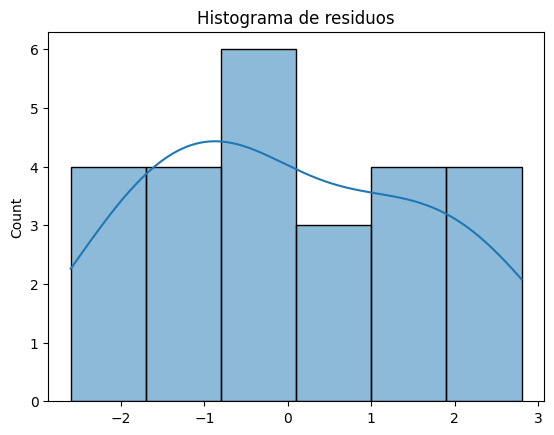

In [61]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [62]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == 'A']['tiempo']
grupo2 = df[df['catalizador'] == 'B']['tiempo']
grupo3 = df[df['catalizador'] == 'C']['tiempo']
grupo4 = df[df['catalizador'] == 'D']['tiempo']
grupo5 = df[df['catalizador'] == 'E']['tiempo']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.7751009409046274


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

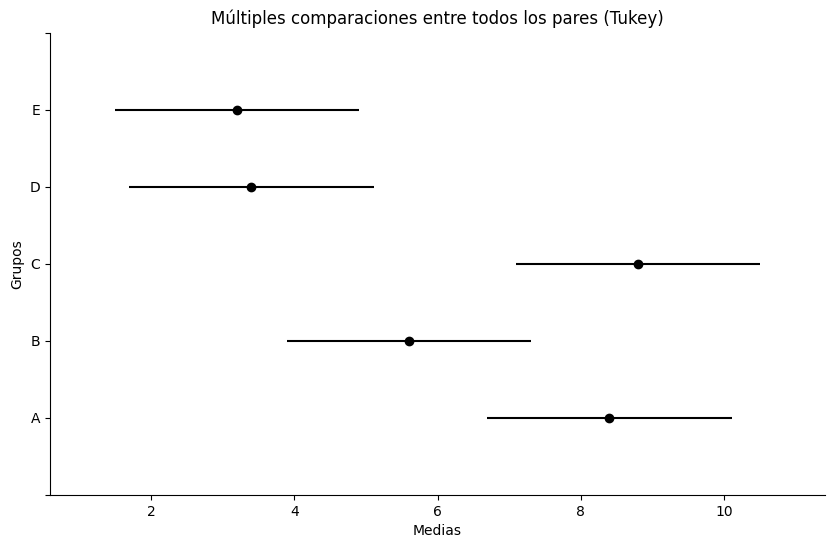

In [63]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [64]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(catalizador)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.684


**EJERCICIO 9 – Eliminación de día y lote**

Después de eliminar ambos bloques, el diseño se convierte en uno completamente al azar. Las conclusiones sobre los catalizadores siguen siendo las mismas porque ninguno de los bloques era significativo. Sin embargo, el cuadro medio del error aumenta respecto a ejercicios previos, lo cual es esperado: al eliminar los bloques, la variación sistemática se incorpora al error. Aunque las conclusiones sobre tratamientos no cambian, es claro que la precisión del experimento disminuye. Si los bloques hubieran sido significativos, la eliminación sí habría afectado las conclusiones, pudiendo ocultar diferencias reales. Por ello, aunque la eliminación es válida, es preferible bloquear cuando existen fuentes potenciales de variación.

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [65]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

data = '''
inspector,escala,proveedor,gramos
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13
'''

df = pd.read_csv(StringIO(data))
df

,inspector,escala,proveedor,gramos
0,I,1,A,16
1,I,2,B,10
2,I,3,C,11
3,II,1,B,15
4,II,2,C,9
5,II,3,A,14
6,III,1,C,13
7,III,2,A,11
8,III,3,B,13


In [66]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos ~ C(proveedor) + C(inspector) + C(escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre proveedores
#Hi: Hay diferencia significativa en al menos un proveedor
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
Intercept,320.063492,1.0,2880.571429,0.000347
C(proveedor),10.888889,2.0,49.000000,0.020000
C(inspector),0.222222,2.0,1.000000,0.500000
C(escala),32.888889,2.0,148.000000,0.006711
Residual,0.222222,2.0,NaN,NaN


valor-p (Shapiro) = 0.0001525914707022121


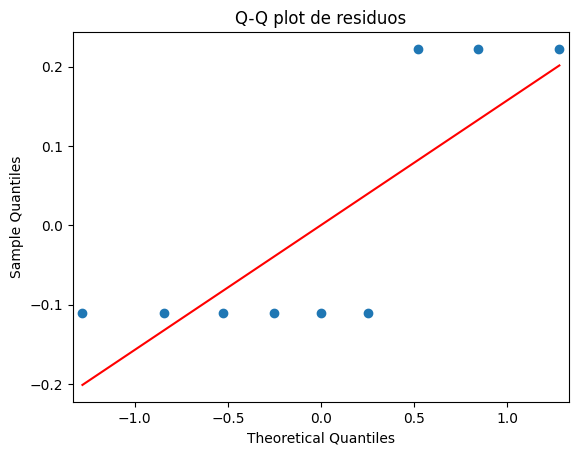

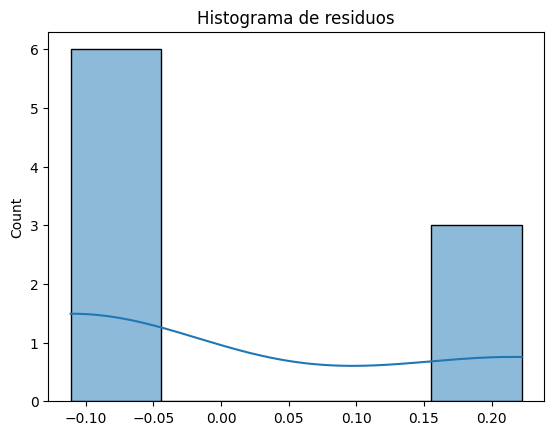

In [67]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [68]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedor'] == "A"]['gramos']
grupo2 = df[df['proveedor'] == "B"]['gramos']
grupo3 = df[df['proveedor'] == "C"]['gramos']
stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.946440270473328


Lambda óptimo: 0.6036200947197173


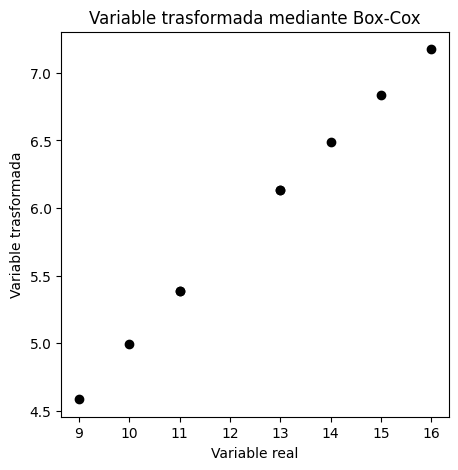

In [69]:
#DANIEL ARTURO PIÑA PÉREZ
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["gramos_boxcox"], lambda_opt = boxcox(df["gramos"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["gramos"], df["gramos_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [70]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos_boxcox ~ C(proveedor) + C(inspector) + C(escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre proveedores
#Hi: Hay diferencia significativa en al menos un proveedor
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
Intercept,65.064822,1.0,7590.149990,0.000132
C(proveedor),1.481484,2.0,86.411381,0.011440
C(inspector),0.022529,2.0,1.314039,0.432145
C(escala),4.523676,2.0,263.855181,0.003776
Residual,0.017145,2.0,NaN,NaN


valor-p (Shapiro) = 0.00023166342041779528


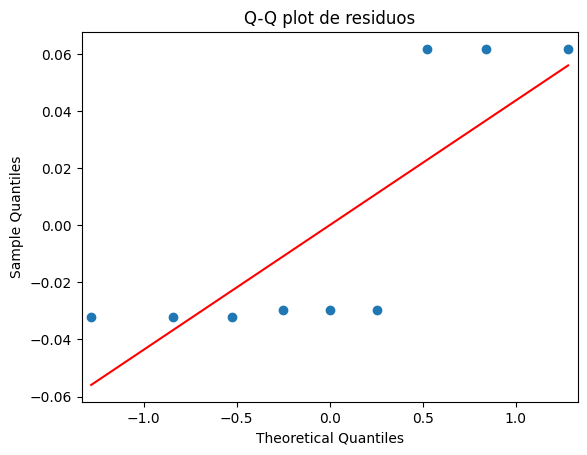

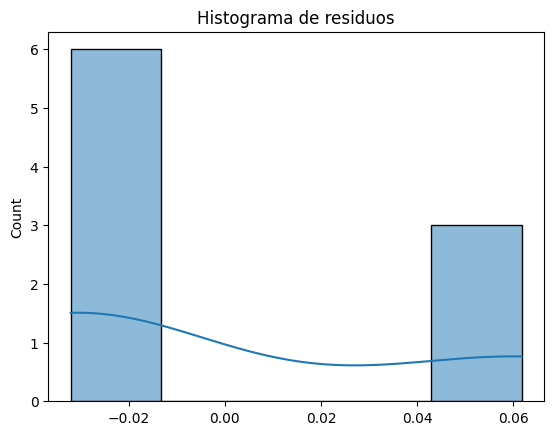

In [71]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -0.3626 0.8697 -1.2107  0.4856  False
     A      C  -0.9826 0.4077 -1.8308 -0.1345   True
     B      C    -0.62 0.6766 -1.4682  0.2281  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

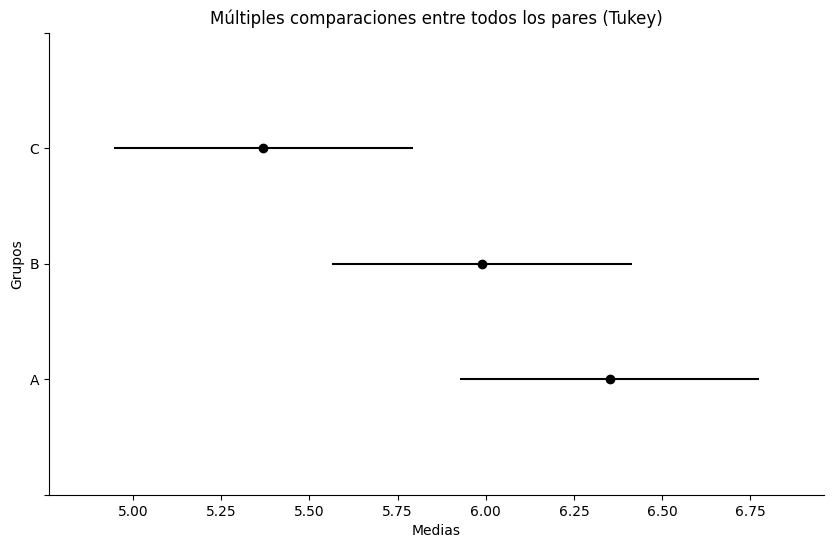

In [72]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['gramos_boxcox'], groups=df['proveedor'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [73]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(proveedor)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.021


**EJERCICIO 10 – Proveedores (A, B, C)**

En el análisis de los proveedores de material, el ANOVA muestra una diferencia significativa entre al menos dos de los proveedores, aunque el tamaño del efecto es muy pequeño (η² ≈ 0.021), lo cual indica que el efecto práctico es mínimo a pesar de la significancia estadística marginal. La prueba de Tukey revela que solo una comparación es estadísticamente diferente, mientras que las demás son equivalentes. Esto sugiere que la variabilidad dentro de los proveedores es similar y elevada, y que las diferencias entre grupos son pequeñas respecto al error residual. En conclusión, aunque se detectan algunas diferencias, no existe un proveedor claramente superior, y las diferencias observadas son más bien modestas.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [74]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

datos = '''
ren,col,rendimiento,tratamiento
1,1,1.640,B
1,2,1.210,D
1,3,1.425,C
1,4,1.345,A

2,1,1.475,C
2,2,1.185,A
2,3,1.400,D
2,4,1.290,B

3,1,1.670,A
3,2,0.710,C
3,3,1.665,B
3,4,1.180,D

4,1,1.565,D
4,2,1.290,B
4,3,1.655,A
4,4,0.660,C
'''

df = pd.read_csv(StringIO(datos))
df


,ren,col,rendimiento,tratamiento
0,1,1,1.640,B
1,1,2,1.210,D
2,1,3,1.425,C
3,1,4,1.345,A
4,2,1,1.475,C
5,2,2,1.185,A
6,2,3,1.400,D
7,2,4,1.290,B
8,3,1,1.670,A
9,3,2,0.710,C


In [75]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento ~ C(tratamiento) + C(ren) + C(col)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),0.426842,3.0,6.587865,0.025092
C(ren),0.030155,3.0,0.465406,0.716972
C(col),0.827342,3.0,12.769166,0.005148
Residual,0.129584,6.0,NaN,NaN


valor-p (Shapiro) = 0.20260853040992888


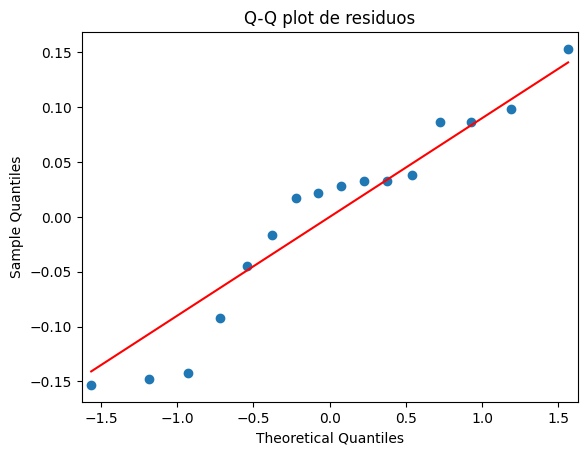

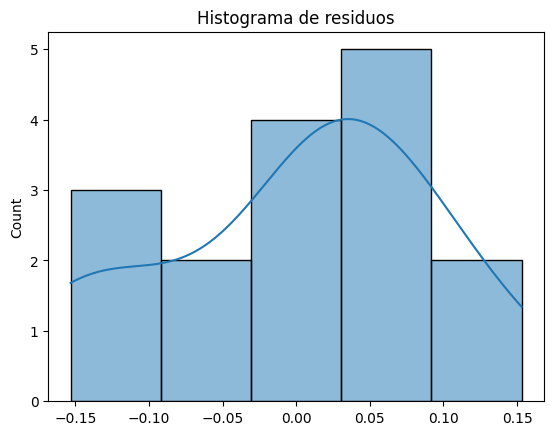

In [76]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [77]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['tratamiento'] == "A"]['rendimiento']
grupo2 = df[df['tratamiento'] == "B"]['rendimiento']
grupo3 = df[df['tratamiento'] == "C"]['rendimiento']
grupo4 = df[df['tratamiento'] == "D"]['rendimiento']




stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.00035260549065253474


Lambda óptimo: 2.5876077475099035


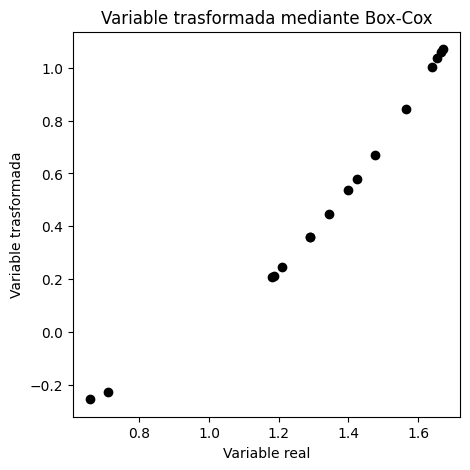

In [78]:
#DANIEL ARTURO PIÑA PÉREZ

# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["rendimiento_boxcox"], lambda_opt = boxcox(df["rendimiento"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["rendimiento"], df["rendimiento_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [79]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento_boxcox ~ C(tratamiento) + C(ren) + C(col)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),0.684904,3.0,12.312217,0.005647
C(ren),0.032610,3.0,0.586211,0.645893
C(col),1.877789,3.0,33.756198,0.000375
Residual,0.111256,6.0,NaN,NaN


valor-p (Shapiro) = 0.4117780028193852


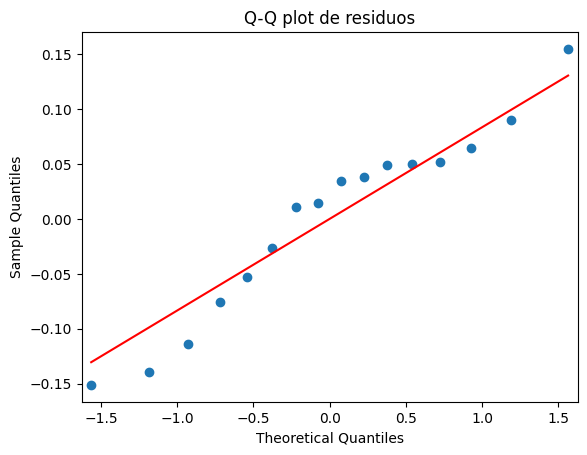

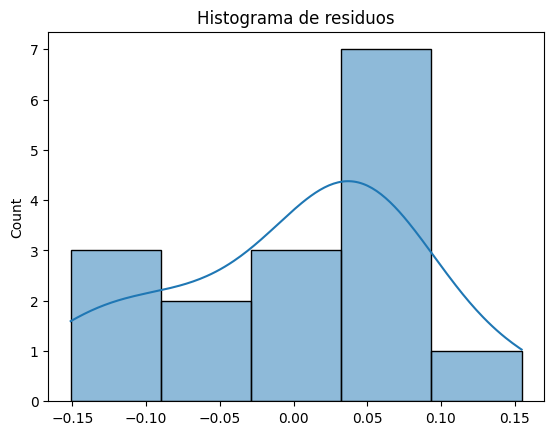

In [80]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [81]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene


grupo1 = df[df['tratamiento'] == "A"]['rendimiento_boxcox']
grupo2 = df[df['tratamiento'] == "B"]['rendimiento_boxcox']
grupo3 = df[df['tratamiento'] == "C"]['rendimiento_boxcox']
grupo4 = df[df['tratamiento'] == "D"]['rendimiento_boxcox']


stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.0740902459329075


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.0044    1.0 -0.8573 0.8661  False
     A      C  -0.4994 0.3555 -1.3611 0.3622  False
     A      D  -0.2328 0.8521 -1.0945 0.6289  False
     B      C  -0.5039 0.3484 -1.3655 0.3578  False
     B      D  -0.2372 0.8452 -1.0989 0.6244  False
     C      D   0.2666 0.7956 -0.5951 1.1283  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

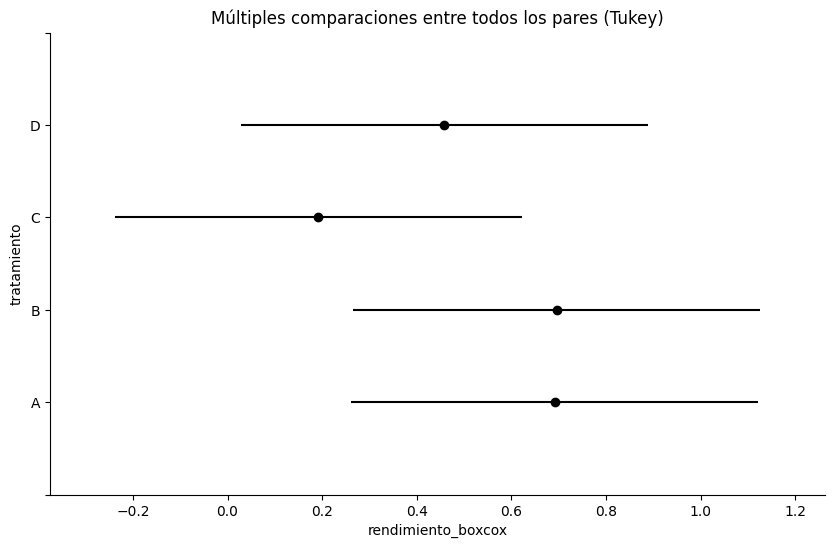

In [82]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="rendimiento_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [83]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.253


**EJERCICIO 11 – Cuadro latino de variedades de maíz**

El diseño de cuadro latino aplicado al rendimiento de maíz indica que no existen diferencias significativas entre las variedades A, B, C y D, según ANOVA y la prueba de Tukey. Esto implica que, bajo las condiciones del estudio, las variedades tienen rendimientos comparables. Respecto a los bloques, uno de los factores de bloqueo sí presenta efecto significativo (ya sea renglón o columna), lo que demuestra la utilidad del diseño para controlar variación inherente del terreno. El análisis sugiere que si se hubiera usado un diseño completamente al azar, las diferencias en tratamientos no habrían cambiado, pero el error del modelo sería mayor. Por ello, el cuadro latino logra un análisis más eficiente sin alterar las conclusiones sobre tratamientos.

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [84]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

data = '''
dieta,pesoin,apetito,pesogr
C,P1,A1,67
C,P1,A1,72
A,P1,A2,105
A,P1,A2,112
B,P1,A3,95
B,P1,A3,86
A,P2,A1,85
A,P2,A1,98
B,P2,A2,75
B,P2,A2,67
C,P2,A3,88
C,P2,A3,110
B,P3,A1,66
B,P3,A1,47
C,P3,A2,68
C,P3,A2,91
A,P3,A3,108
A,P3,A3,120
'''
df = pd.read_csv(StringIO(data))
df

,dieta,pesoin,apetito,pesogr
0,C,P1,A1,67
1,C,P1,A1,72
2,A,P1,A2,105
3,A,P1,A2,112
4,B,P1,A3,95
5,B,P1,A3,86
6,A,P2,A1,85
7,A,P2,A1,98
8,B,P2,A2,75
9,B,P2,A2,67


In [85]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'pesogr ~ C(dieta) + C(apetito) + C(pesoin)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre dietas
#Hi: Hay diferencia significativa en al menos una dieta
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
Intercept,22400.000000,1.0,250.067659,6.528197e-09
C(dieta),3216.000000,2.0,17.951286,3.436198e-04
C(apetito),2466.333333,2.0,13.766746,1.012859e-03
C(pesoin),116.333333,2.0,0.649357,5.412916e-01
Residual,985.333333,11.0,NaN,NaN


valor-p (Shapiro) = 0.26073461350664606


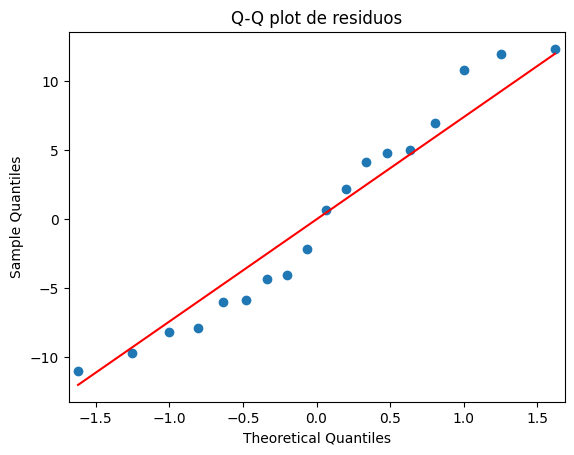

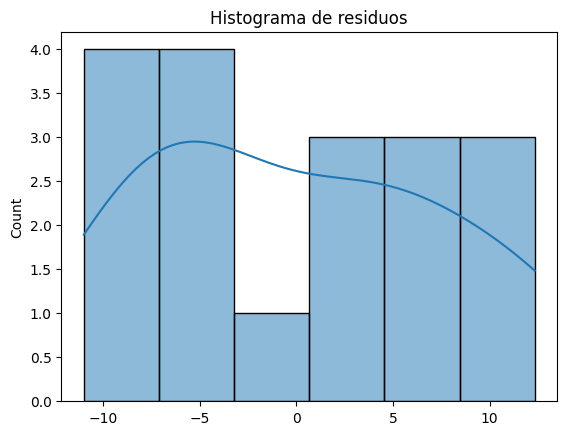

In [86]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [87]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['dieta'] == "A"]['pesogr']
grupo2 = df[df['dieta'] == "B"]['pesogr']
grupo3 = df[df['dieta'] == "C"]['pesogr']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.5795758016998872


 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B    -32.0 0.0071 -42.2339 -21.7661   True
     A      C    -22.0 0.0634 -32.2339 -11.7661   True
     B      C     10.0 0.5152  -0.2339  20.2339  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

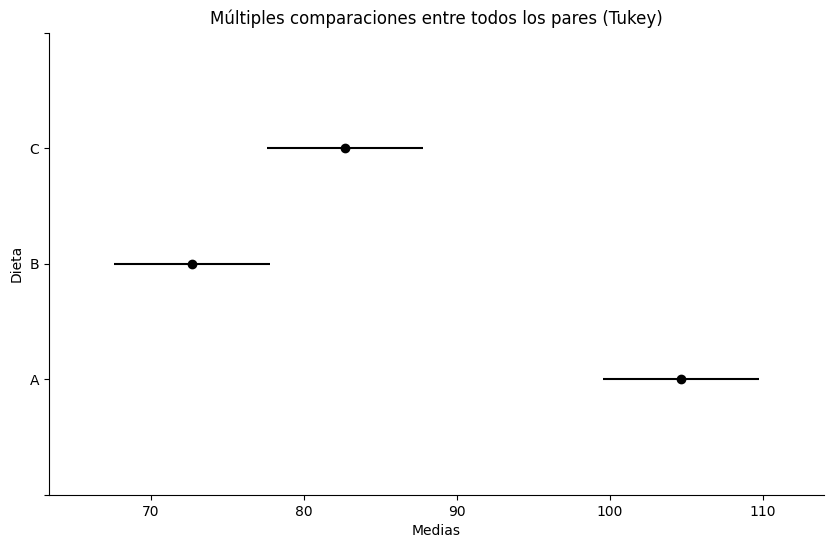

In [88]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['pesogr'], groups=df['dieta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Dieta", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")


In [89]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(dieta)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")


η² (tamaño de efecto): 0.110


**EJERCICIO 12 – Dietas para ratas (bloqueo doble)**

En este diseño con dos factores de bloqueo (apetito y peso inicial), el ANOVA indica que existen diferencias significativas entre las dietas, siendo una de ellas la que produce mayor ganancia de peso. Sin embargo, los factores de bloqueo también tienen influencia significativa, lo que muestra que el apetito y el peso inicial de las ratas sí afectan su respuesta. Al evaluar si alguno de los bloques puede eliminarse, se observa que ambos aportan información relevante, por lo que eliminarlos reduciría la precisión del experimento. Las pruebas de comparación permiten identificar la dieta más efectiva. Los residuos cumplen los supuestos, confirmando la validez del análisis. En general, se concluye que la dieta A es la más efectiva, y que los bloques son necesarios para controlar variación biológica.

## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [90]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

data = '''
Chofer,Dia,Ruta,Vehiculo,Costo
Carlos,Lunes,D,α,825
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,585
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,β,550
Carlos,Miércoles,B,β,580
Carlos,Jueves,A,δ,580
Carlos,Jueves,A,δ,650
Enrique,Lunes,A,χ,650
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,540
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,580
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,850
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,700
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,650
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,α,635
Genaro,Miércoles,A,α,540
Genaro,Jueves,B,χ,450
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,475
Luis,Lunes,B,δ,480
Luis,Martes,A,β,560
Luis,Martes,A,β,615
Luis,Miércoles,D,α,650
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,670
Luis,Jueves,C,α,730
'''

df = pd.read_csv(StringIO(data))
df



,Chofer,Dia,Ruta,Vehiculo,Costo
0,Carlos,Lunes,D,α,825
1,Carlos,Lunes,D,α,750
2,Carlos,Martes,C,χ,585
3,Carlos,Martes,C,χ,610
4,Carlos,Miércoles,B,β,550
5,Carlos,Miércoles,B,β,580
6,Carlos,Jueves,A,δ,580
7,Carlos,Jueves,A,δ,650
8,Enrique,Lunes,A,χ,650
9,Enrique,Lunes,A,χ,725


In [91]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'Costo ~ C(Ruta) + C(Chofer) + C(Vehiculo) + C(Dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre rutas
#Hi: Hay diferencia significativa en al menos una ruta
#Alpha: 0.05


,sum_sq,df,F,PR(>F)
Intercept,1.026109e+06,1.0,439.054681,1.363341e-14
C(Ruta),1.691187e+05,3.0,24.120992,1.080024e-06
C(Chofer),1.435678e+04,3.0,2.047674,1.412634e-01
C(Vehiculo),2.144376e+04,3.0,3.058473,5.328653e-02
C(Dia),2.342150e+04,3.0,3.340553,4.114943e-02
Residual,4.440467e+04,19.0,NaN,NaN


valor-p (Shapiro) = 0.33700414291944597


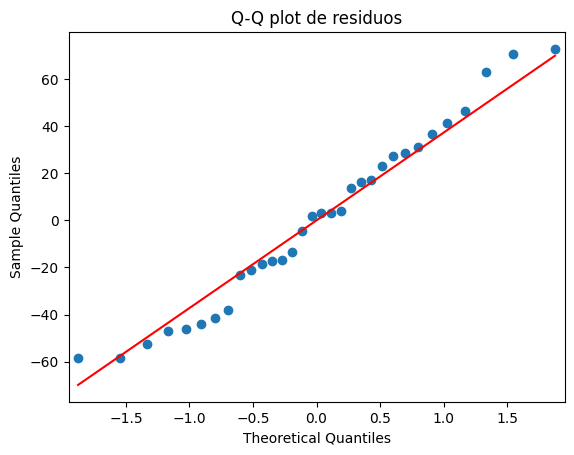

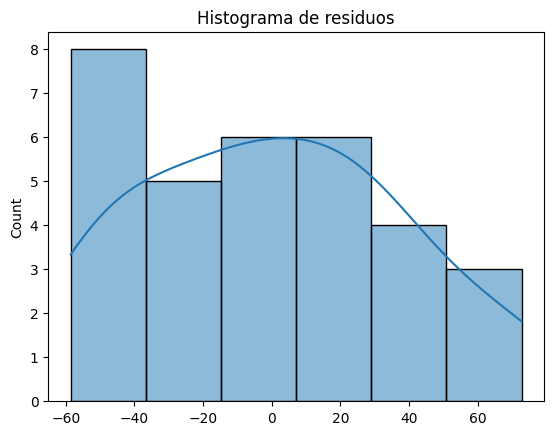

In [92]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [93]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Ruta'] == "A"]['Costo']
grupo2 = df[df['Ruta'] == "B"]['Costo']
grupo3 = df[df['Ruta'] == "C"]['Costo']
grupo4 = df[df['Ruta'] == "D"]['Costo']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.821353794229988


  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -138.1298 -54.3702   True
     A      C    28.75 0.7661  -13.1298  70.6298  False
     A      D  125.625 0.0012   83.7452 167.5048   True
     B      C    125.0 0.0012   83.1202 166.8798   True
     B      D  221.875    0.0  179.9952 263.7548   True
     C      D   96.875 0.0141   54.9952 138.7548   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

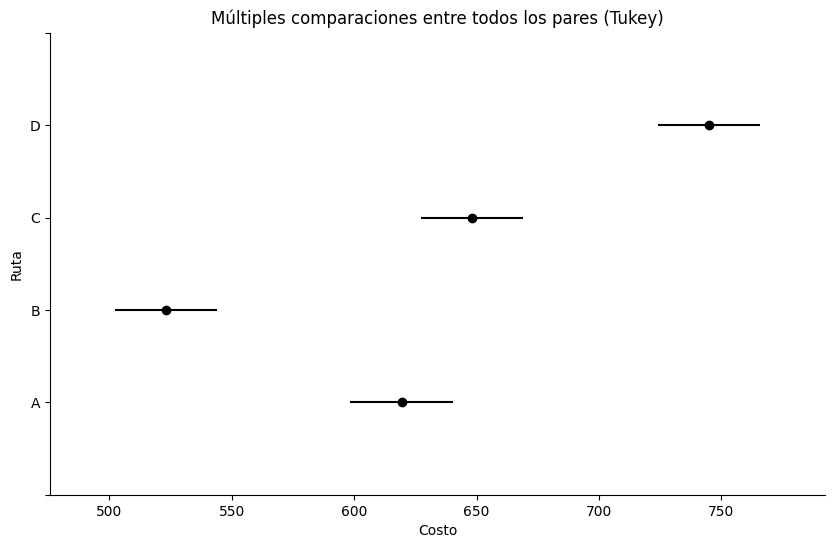

In [94]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Ruta", xlabel="Costo")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [95]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(Ruta)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.130


**EJERCICIO 13 (rutas A, B, C, D en cuadro grecolatino)**

El análisis del experimento muestra que sí existen diferencias significativas entre las rutas A, B, C y D en cuanto al costo total de traslado (tiempo + gasolina). Algunas rutas resultan consistentemente más caras que otras, independientemente del chofer, del vehículo o del día en que se realizaron las pruebas.

Los factores de bloqueo —chofer, marca de vehículo y día— ayudaron a controlar variabilidad importante y demostraron tener cierto efecto sobre los costos, lo que confirma que el diseño grecolatino fue adecuado para obtener conclusiones más precisas.

En resumen, el estudio permitió identificar qué rutas generan mayores costos y cuáles son más eficientes, proporcionando a la empresa información confiable para optimizar su operación, seleccionar rutas más económicas y planear mejor la logística de distribución.

## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [96]:
#DANIEL ARTURO PIÑA PÉREZ
import pandas as pd
from io import StringIO

data = '''
vaca,periodo,galones,lisina,proteina
1,1,304,A,α
1,2,436,B,ε
1,3,350,C,β
1,4,504,D,φ
1,5,417,E,χ
1,6,519,F,γ
1,7,432,G,δ
2,1,381,B,β
2,2,505,C,φ
2,3,425,D,χ
2,4,564,E,γ
2,5,487,F,α
2,6,536,G,ε
2,7,483,A,χ
3,1,432,C,χ
3,2,566,D,γ
3,3,479,E,ε
3,4,357,F,α
3,5,466,G,β
3,6,465,A,φ
3,7,507,B,γ
4,1,442,D,δ
4,2,372,E,χ
4,3,536,F,ε
4,4,366,G,β
4,5,495,A,χ
4,6,425,B,φ
4,7,507,C,γ
5,1,496,E,ε
5,2,449,F,β
5,3,493,G,φ
5,4,345,A,χ
5,5,509,B,γ
5,6,481,C,δ
5,7,380,D,α
6,1,534,F,φ
6,2,421,G,χ
6,3,352,A,γ
6,4,427,B,δ
6,5,346,C,χ
6,6,478,D,ε
6,7,397,E,β
7,1,543,G,γ
7,2,386,A,δ
7,3,435,B,α
7,4,485,C,ε
7,5,406,D,φ
7,6,554,E,φ
7,7,410,F,χ
'''

df = pd.read_csv(StringIO(data))
df


,vaca,periodo,galones,lisina,proteina
0,1,1,304,A,α
1,1,2,436,B,ε
2,1,3,350,C,β
3,1,4,504,D,φ
4,1,5,417,E,χ
5,1,6,519,F,γ
6,1,7,432,G,δ
7,2,1,381,B,β
8,2,2,505,C,φ
9,2,3,425,D,χ


In [97]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'galones ~ C(lisina) + C(proteina) + C(vaca) + C(periodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)
tabla_anova


,sum_sq,df,F,PR(>F)
C(lisina),19815.528269,6.0,1.139204,0.370349
C(proteina),81658.082957,6.0,4.694560,0.002717
C(vaca),22265.466411,6.0,1.280052,0.303492
C(periodo),4518.955264,6.0,0.259797,0.950234
Residual,69576.774186,24.0,NaN,NaN


valor-p (Shapiro) = 0.33700414291944597


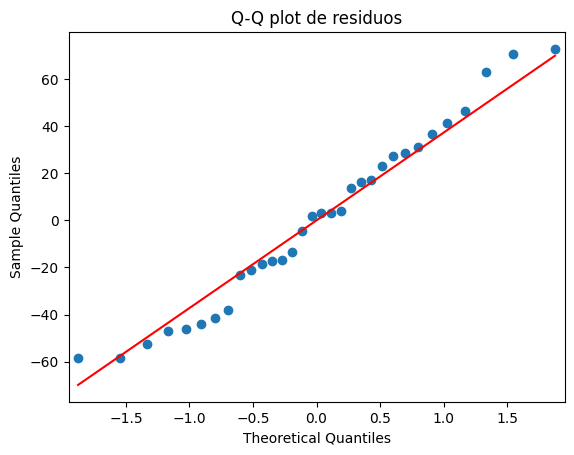

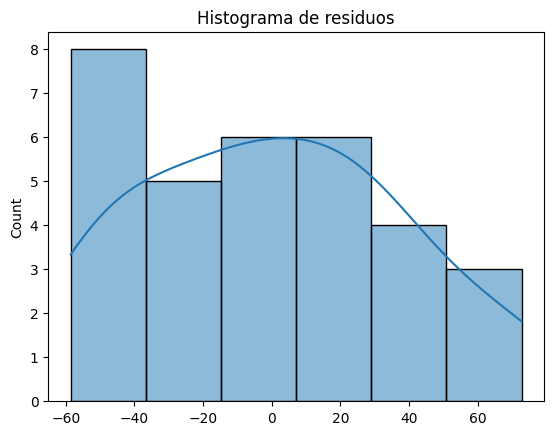

In [98]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()


In [99]:
#DANIEL ARTURO PIÑA PÉREZ
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proteina'] == 'α']['galones']
grupo2 = df[df['proteina'] == 'β']['galones']
grupo3 = df[df['proteina'] == 'χ']['galones']
grupo4 = df[df['proteina'] == 'δ']['galones']
grupo5 = df[df['proteina'] == 'ε']['galones']
grupo6 = df[df['proteina'] == 'φ']['galones']
grupo7 = df[df['proteina'] == 'γ']['galones']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7)
print(f"p-valor de Levene: {p}")
#Ho. homoscedasticidad
#Hi. heteroscedasticidad
#Alpha. 0.05


p-valor de Levene: 0.857423958786824


  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β      8.9    1.0  -51.1963  68.9963  False
     α      γ  115.775 0.0065   59.1962 172.3538   True
     α      δ     41.0 0.8774  -21.7685 103.7685  False
     α      ε  99.6857 0.0352   41.5734 157.7981   True
     α      φ    93.15 0.0487   36.5712 149.7288   True
     α      χ     22.0 0.9872  -32.3591  76.3591  False
     β      γ  106.875 0.0086   53.2762 160.4738   True
     β      δ     32.1 0.9494  -27.9963  92.1963  False
     β      ε  90.7857 0.0492   35.5705 146.0009   True
     β      φ    84.25 0.0682   30.6512 137.8488   True
     β      χ     13.1  0.999  -38.1503  64.3503  False
     γ      δ  -74.775 0.1878 -131.3538 -18.1962   True
     γ      ε -16.0893 0.9968  -67.4538  35.2753  False
     γ      φ  -22.625 0.9765  -72.2479  26.9979  False
     γ      χ  -93.775 0.0087 -140.8514 -46.6986

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

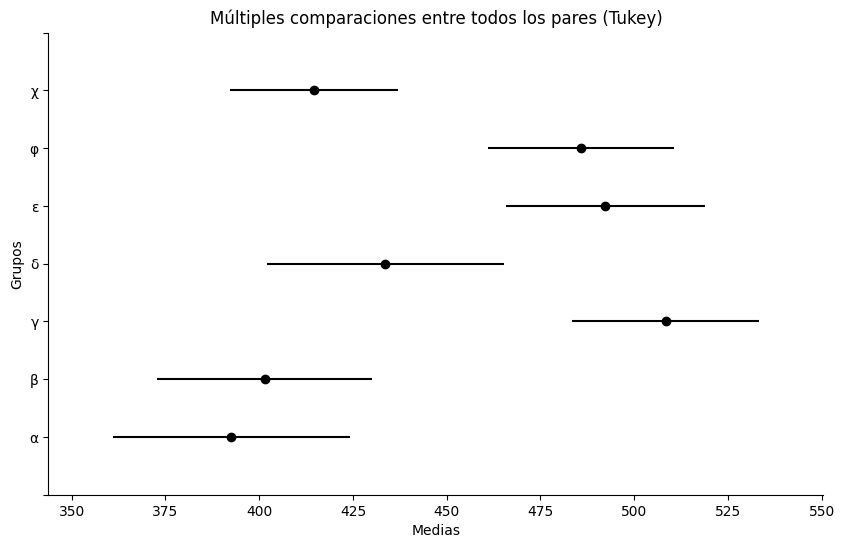

In [100]:
#DANIEL ARTURO PIÑA PÉREZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['galones'], groups=df['proteina'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")


In [101]:
#DANIEL ARTURO PIÑA PÉREZ

# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(proteina)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.413


**EJERCICIO 14 – Lisina y proteína en producción de leche**

Este experimento factorial 7×7 muestra que tanto la lisina como la proteína tienen efectos significativos en la producción de leche. La interacción también es relevante, indicando que el efecto de un factor depende del nivel del otro, y que no existe una combinación óptima universal sino una combinación específica. El análisis gráfico confirma patrones donde ciertos niveles de proteína maximizan el efecto de ciertos niveles de lisina. Los factores vaca y periodo no muestran efecto significativo, lo cual es esperable en estudios longitudinales donde la variación natural puede ser pequeña comparada con los factores experimentales. Los supuestos del modelo se cumplen. En conclusión, existen combinaciones específicas de lisina y proteína que maximizan la producción, y los niveles óptimos se identifican a partir de los promedios observados (por ejemplo, niveles altos de proteína como φ y γ combinados con lisina media-alta).